In [1]:
# Importing
import theano.tensor as T
import theano
import sys, os
sys.path.append("../GeMpy")

# Importing GeMpy modules
import GeMpy

# Reloading (only for development purposes)
import importlib
importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  False,
                   threshold=50)

#%matplotlib inline
%matplotlib inline

In [2]:
"""
2 Horizontal layers with drift oen
"""
# Importing the data from csv files and settign extent and resolution
geo_data = GeMpy.import_data([0, 10, 0, 10, -10, 0], [50, 50, 50],
                             path_f="./GeoModeller/test_e/test_e_Foliations.csv",
                             path_i="./GeoModeller/test_e/test_e_Points.csv")



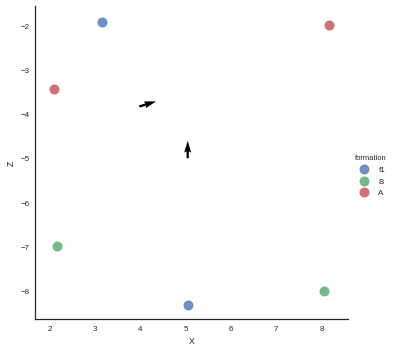

In [3]:
GeMpy.plot_data(geo_data)

In [4]:
geo_data.foliations

,X,Y,Z,azimuth,dip,polarity,formation,series,order_series,G_x,G_y,G_z
0,3.980732,5.012474,-3.832,90.0,72.897,1,f1,Default serie,1,0.955778,5.852450e-17,0.29409
1,5.047732,5.012474,-5.000,90.0,0.000,1,A,Default serie,1,0.000000,0.000000e+00,1.00000


In [5]:
GeMpy.set_data_series(geo_data, {'series': ('A', 'B'),
                      'fault1': 'f1'}, order_series = ['fault1', 'series'])

#geo_data = GeMpy.select_series(geo_data, ['fault1'])
#GeMpy.plot_data(geo_data)
data_interp = GeMpy.set_interpolator(geo_data,
                                     dtype="float64",
                                     verbose=[#'solve_kriging',
                                           #  'matrices_shapes',
                                     #         'faults block',
                                      #   'grid_val'
                                         "potential_field_at_interfaces",
                                      #   "potential_field_at_all",
                                         'n_formation',
                                          #   'faults_contribution',
                                             'faults_matrix'
                                     ])

[2, 2]


In [6]:
# This cell will go to the backend

# Set all the theano shared parameters and return the symbolic variables (the input of the theano function)
input_data_T = data_interp.interpolator.tg.input_parameters_list()

# Prepare the input data (interfaces, foliations data) to call the theano function.
# Also set a few theano shared variables with the len of formations series and so on
input_data_P = data_interp.interpolator.data_prep(u_grade=[3, 3])

# Compile the theano function.
compiled_f = theano.function(input_data_T,
                             data_interp.interpolator.tg.whole_block_model(1,
                                compute_pf=1),
                             allow_input_downcast=True, profile=True)

[3, 3]
n_formation_fault __str__ = [1]
n_formation_series __str__ = [2 3]


In [7]:
sol = compiled_f(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

Faults interfaces matrix rest __str__ = []
len points __str__ = 3
Faults interfaces matrix ref __str__ = []
Faults interfaces matrix __str__ = []
Value of the potential field at the interfaces __str__ = [ 1.084767  1.549592  1.833368]
n_formation_fault __str__ = [1]
Faults interfaces matrix rest __str__ = [[1 1]]
len points __str__ = 3
Faults interfaces matrix ref __str__ = [[0 0]]
Faults interfaces matrix __str__ = [[1 1]]
Value of the potential field at the interfaces __str__ = [ 0.372115  0.518623  1.133625]
n_formation_series __str__ = [2 3]


In [8]:
sol.shape

(1, 2, 125000)

In [9]:
input_data_P


[array([[ 0.409738,  0.5001  ,  0.601286],
        [ 0.493288,  0.5001  ,  0.509828]]),
 array([ 72.897,   0.   ]),
 array([ 90.,  90.]),
 array([ 1.,  1.]),
 array([[ 0.345569,  0.5001  ,  0.7501  ],
        [ 0.268087,  0.5001  ,  0.354709],
        [ 0.262293,  0.5001  ,  0.631903]]),
 array([[ 0.493429,  0.5001  ,  0.2501  ],
        [ 0.728198,  0.5001  ,  0.274917],
        [ 0.737907,  0.5001  ,  0.744738]])]

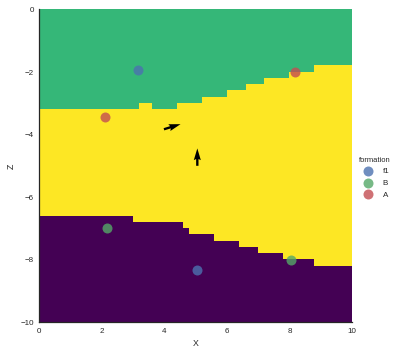

In [10]:
GeMpy.plot_section(geo_data, 25, block=sol[0,0, :], direction='y', plot_data=True)


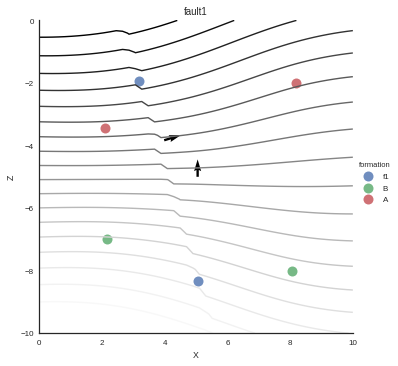

In [11]:

GeMpy.plot_potential_field(geo_data, sol[0, 1, :], 25)

In [37]:
from evtk.hl import gridToVTK 

import numpy as np 

import random as rnd 

# Dimensions 

nx, ny, nz = 50, 50, 50 

lx, ly, lz = 10., 10., -10.0 

dx, dy, dz = lx/nx, ly/ny, lz/nz 

ncells = nx * ny * nz 

npoints = (nx + 1) * (ny + 1) * (nz + 1) 

# Coordinates 

X = np.arange(0, lx + 0.1*dx, dx, dtype='float64') 

Y = np.arange(0, ly + 0.1*dy, dy, dtype='float64') 

Z = np.arange(0, lz + 0.1*dz, dz, dtype='float64') 

x = np.zeros((nx + 1, ny + 1, nz + 1)) 

y = np.zeros((nx + 1, ny + 1, nz + 1)) 

z = np.zeros((nx + 1, ny + 1, nz + 1)) 

# We add some random fluctuation to make the grid more interesting 

for k in range(nz + 1): 

    for j in range(ny + 1):
        for i in range(nx + 1): 
 
            x[i,j,k] = X[i] + (0.5 - rnd.random()) * 0.2 * dx 

            y[i,j,k] = Y[j] + (0.5 - rnd.random()) * 0.2 * dy 

            z[i,j,k] = Z[k] + (0.5 - rnd.random()) * 0.2 * dz 

# Variables 

pressure = sol[0,0,:].reshape( (nx, ny, nz)) 

gridToVTK("./structured", x, y, z, cellData = {"pressure" : pressure})

'/home/miguel/PycharmProjects/GeMpy/test/structured.vts'

In [38]:
from evtk.hl import gridToVTK 

import numpy as np 

# Dimensions 


nx, ny, nz = 50, 50, 50 

lx, ly, lz = 10., 10., -10.0 

dx, dy, dz = lx/nx, ly/ny, lz/nz 

ncells = nx * ny * nz 

npoints = (nx + 1) * (ny + 1) * (nz + 1) 

# Coordinates 

x = np.arange(0, lx + 0.1*dx, dx, dtype='float64') 

y = np.arange(0, ly + 0.1*dy, dy, dtype='float64') 

z = np.arange(0, lz + 0.1*dz, dz, dtype='float64') 

# Variables 
 
pressure = sol[0,0,:].reshape( (nx, ny, nz))

temp = np.random.rand(npoints).reshape( (nx + 1, ny + 1, nz + 1)) 

gridToVTK("./rectilinear", x, y, z, cellData = {"lithology" : pressure},) 

'/home/miguel/PycharmProjects/GeMpy/test/rectilinear.vtr'

In [16]:
 def export_to_vtk(self, vtk_filename="geo_grid", real_coords = True, **kwds):
        """Export grid to VTK for visualisation

        **Arguments**:
            - *vtk_filename* = string : vtk filename (obviously...)
            - *real_coords* = bool : model extent in "real world" coordinates

        **Optional Keywords**:
            - *grid* = numpy grid : grid to save to vtk (default: self.grid)
            - *var_name* = string : name of variable to plot (default: Geology)

        Note: requires pyevtk, available at: https://bitbucket.org/pauloh/pyevtk
        """
        grid = kwds.get("grid", self.grid)
        var_name = kwds.get("var_name", "Geology")
        #from evtk.hl import gridToVTK
        import pyevtk
        from pyevtk.hl import gridToVTK
        # define coordinates
        x = np.zeros(self.nx + 1)
        y = np.zeros(self.ny + 1)
        z = np.zeros(self.nz + 1)
        x[1:] = np.cumsum(self.delx)
        y[1:] = np.cumsum(self.dely)
        z[1:] = np.cumsum(self.delz)



        # plot in coordinates
        if real_coords:
            x += self.xmin
            y += self.ymin
            z += self.zmin


        gridToVTK(vtk_filename, x, y, z,
                  cellData = {var_name: grid})

In [12]:
import pyevtk

ModuleNotFoundError: No module named 'pyevtk'

In [19]:
from pyevtk.hl import gridToVTK

In [32]:
from evtk.hl import gridToVTK  

nx = geo_data.resolution[0]
ny = geo_data.resolution[1]
nz = geo_data.resolution[2]
dx = (geo_data.extent[0] - geo_data.extent[1]) / geo_data.resolution[0]
dy = (geo_data.extent[2] - geo_data.extent[3]) / geo_data.resolution[1]
dz = (geo_data.extent[4] - geo_data.extent[5]) / geo_data.resolution[2]

In [36]:
x = np.zeros((nx + 1, ny + 1, nz + 1))


array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 

In [28]:
x = np.zeros(geo_data.resolution[0] + 1)
y = np.zeros(geo_data.resolution[1] + 1)
z = np.zeros(geo_data.resolution[2] + 1)
x[1:] = np.cumsum(dx)
y[1:] = np.cumsum(dy)
z[1:] = np.cumsum(dz)


In [26]:
gridToVTK('example2', x, y, z,
              cellData = {'Lithology': sol[0, 0, :].reshape(50,50,50)})

'/home/miguel/PycharmProjects/GeMpy/test/example2.vtr'

In [28]:
import vtk

In [19]:
import evtk.hl

In [21]:
evtk.hl.unstructuredGridToVTK('example_u', x, y, z,
              cellData = {'Lithology': sol[0, 0, :]})

TypeError: unstructuredGridToVTK() missing 3 required positional arguments: 'connectivity', 'offsets', and 'cell_types'

In [22]:
import numpy as np
from enthought.tvtk.api import tvtk, write_data

data = np.random.random((10,10,10))

grid = tvtk.ImageData(spacing=(10, 5, -10), origin=(100, 350, 200), 
                      dimensions=data.shape)
grid.point_data.scalars = np.ravel(order='F')
grid.point_data.scalars.name = 'Test Data'

# Writes legacy ".vtk" format if filename ends with "vtk", otherwise
# this will write data using the newer xml-based format.
write_data(grid, 'test.vtk')

ModuleNotFoundError: No module named 'enthought'